##Exploratory Data Analysis (EDA)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv'
df = pd.read_csv(url)

#EDA
print("\n Jumlah Missing Values per Kolom:")
print(df.isnull().sum())


 Jumlah Missing Values per Kolom:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


##Feature Engineering


Total Missing Values setelah imputasi: 0


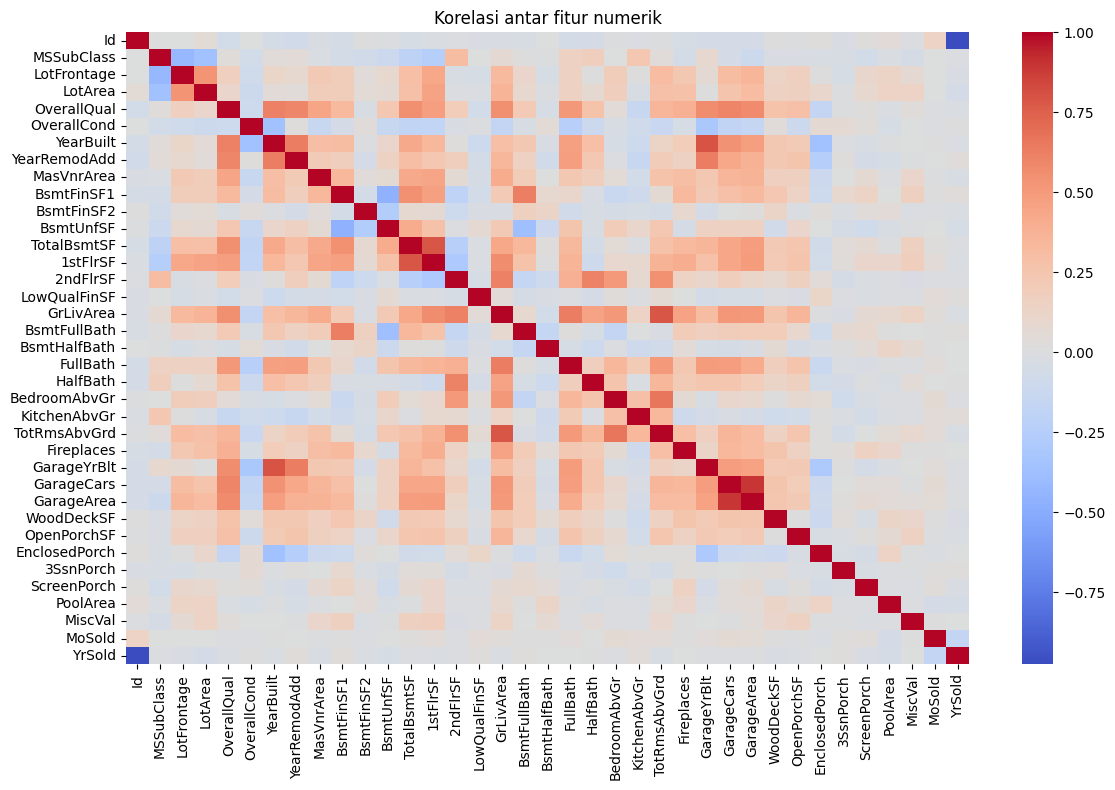

In [25]:
#Numerik: median, Kategorikal: modus
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nTotal Missing Values setelah imputasi:", df.isnull().sum().sum())

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.tight_layout()
plt.show()

##Preprocessing untuk Modeling

In [26]:
target_column = 'GrLivArea'
X = df.drop(columns=[target_column])
y = df[target_column]

# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

##Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##Model Training

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Prediksi

In [29]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

##Evaluasi

In [30]:
def evaluate(y_true, y_pred, dataset=''):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nEvaluasi Model ({dataset} Set):")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")

evaluate(y_train, y_pred_train, "Training")
evaluate(y_test, y_pred_test, "Testing")


Evaluasi Model (Training Set):
MSE  : 0.00
RMSE : 0.00
R²   : 1.00

Evaluasi Model (Testing Set):
MSE  : 0.00
RMSE : 0.00
R²   : 1.00


##Visualisasi Prediksi vs Aktual

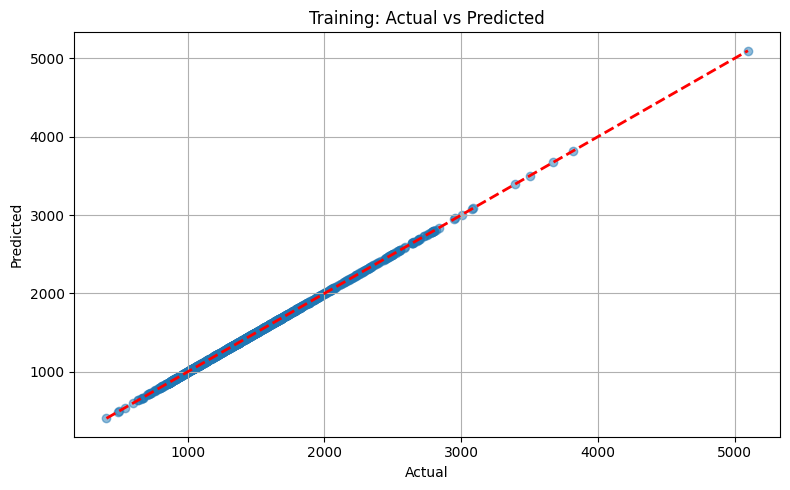

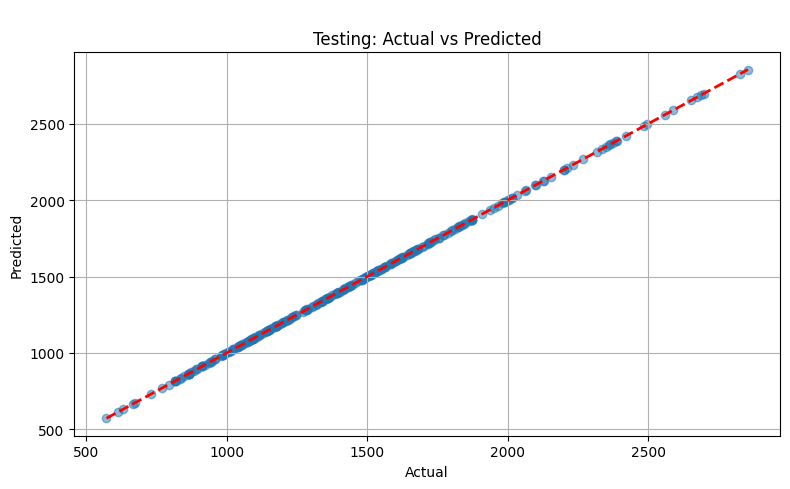

In [31]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_train, y_pred_train, 'Training: Actual vs Predicted')
plot_predictions(y_test, y_pred_test, '\nTesting: Actual vs Predicted')

##Penjelasan Matematika

### 1. **MSE (Mean Squared Error)**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Mengukur rata-rata kuadrat error (perbedaan antara nilai aktual dan prediksi).  
Semakin kecil, semakin baik.

### 2. **RMSE (Root Mean Squared Error)**

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Akar dari MSE. Dalam satuan yang sama dengan target, jadi lebih mudah dipahami.

### 3. **R² Score (Koefisien Determinasi)**

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

Menjelaskan seberapa baik variabel independen menjelaskan variasi target.  
Semakin dekat ke 1 → semakin baik.
